In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf


In [3]:
ativos = ['ABEV3.SA', 'PETR4.SA', 'VALE3.SA', 'BRFS3.SA', 'ALUP4.SA']

data_inicio = pd.to_datetime('2019-01-01')
data_fim = pd.to_datetime('2023-01-01')

#Portifolio 1/n
pesos = np.array([0.2,0.2,0.2,0.2,0.2])

In [4]:
portifolio = yf.download(ativos, start = data_inicio, end = data_fim)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [5]:
portifolio.head()

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2019-01-02,13.950426,4.629724,22.379999,9.896698,36.257858
2019-01-03,14.105910,4.701564,21.490000,10.139386,34.774612
2019-01-04,14.295947,4.549901,21.450001,10.168180,37.038513
2019-01-07,14.235481,4.629724,21.590000,10.328599,36.839798
2019-01-08,13.950426,4.645687,22.930000,10.266899,37.194637


In [6]:
#Calcula a porcentagem de retorno de cada ativo por dia
retornos = portifolio.pct_change().dropna()
retornos

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2019-01-03,0.011145,0.015517,-0.039768,0.024522,-0.040908
2019-01-04,0.013472,-0.032258,-0.001861,0.002840,0.065102
2019-01-07,-0.004230,0.017544,0.006527,0.015777,-0.005365
2019-01-08,-0.020024,0.003448,0.062066,-0.005974,0.009632
2019-01-09,0.014242,-0.003436,0.027039,0.020833,0.024423
...,...,...,...,...,...
2022-12-23,0.013870,0.009751,0.035813,0.047103,0.006647
2022-12-26,-0.006840,0.013948,-0.010638,-0.007166,0.009152
2022-12-27,0.000000,-0.026455,-0.033602,0.006816,0.023878


<AxesSubplot: xlabel='Date'>

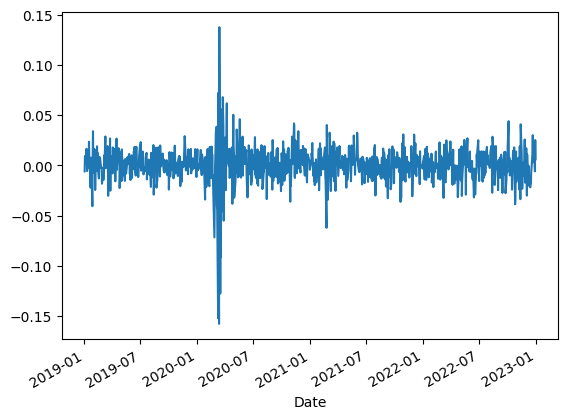

In [7]:
# Media ponderada de acordo com os pesos
retorno_medio = (retornos*pesos).sum(axis=1)

# Transformando em Serie Temporal
retorno_carteira = pd.Series(retorno_medio, name="Portifolio")

# Retorno Diario do portifolio
retorno_carteira.plot()


<AxesSubplot: xlabel='Date'>

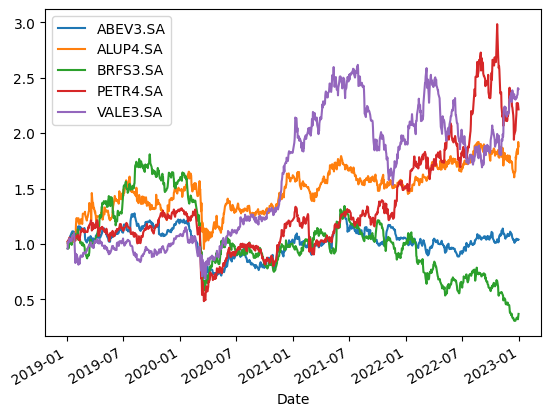

In [8]:
retorno_acumulado = (1+retornos).cumprod()
retorno_acumulado.plot()

<AxesSubplot: xlabel='Date'>

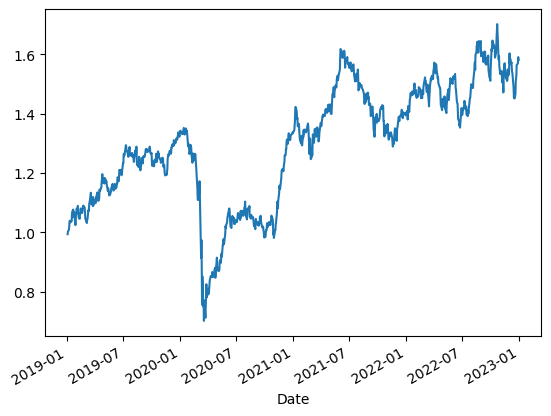

In [9]:
retorno_acumulado = (retorno_acumulado*pesos).sum(axis=1)
retorno_acumulado.plot()

In [10]:
# Matriz de Covariância 

# Na matriz de covariancia, a diagonal representa a variancia de cada ativo

cov = retornos.cov()
cov

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
ABEV3.SA,0.000431,0.000127,0.000245,0.000253,0.000112
ALUP4.SA,0.000127,0.000531,0.000164,0.000231,0.000126
BRFS3.SA,0.000245,0.000164,0.000970,0.000362,0.000194
PETR4.SA,0.000253,0.000231,0.000362,0.000896,0.000399
VALE3.SA,0.000112,0.000126,0.000194,0.000399,0.000732


In [13]:
# Matriz de Correlação 

cor = retornos.corr()
cor

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
ABEV3.SA,1.000000,0.264603,0.379661,0.407475,0.198763
ALUP4.SA,0.264603,1.000000,0.228764,0.334772,0.202939
BRFS3.SA,0.379661,0.228764,1.000000,0.388780,0.230852
PETR4.SA,0.407475,0.334772,0.388780,1.000000,0.492810
VALE3.SA,0.198763,0.202939,0.230852,0.492810,1.000000


In [16]:
np.dot(cov, pesos)

array([0.00023362, 0.00023572, 0.0003872 , 0.0004284 , 0.00031271])

In [17]:
np.dot(pesos.T, np.dot(cov, pesos))


0.0003195288622321078

In [18]:
# Volatilidade da carteira

vol_diaria = np.sqrt(np.dot(pesos.T, np.dot(cov, pesos)))
vol_diaria

0.017875370268391862

In [21]:
vol_anualizada = vol_diaria*np.sqrt(252)
vol_anualizada

0.28376270594017666